# Proyek Analisis Data: [products_dataset.cvs]
- **Nama:** [Elsa Septiana Rif'at]
- **Email:** [eseptiana674@gmail.com]
- **ID Dicoding:** [elsaseptiana]

## Menentukan Pertanyaan Bisnis

- Dari kota mana saja pelanggan berasal?
- Status pesanan mana yang paling sering muncul?

## Import Semua Packages/Library yang Digunakan

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [79]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [80]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- menampilkan 5 data customer
- menampilkan 5 data order

### Assessing Data

In [81]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [82]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [83]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [84]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- menampilkan ringkasan dataset
- menampilkan total data duplikat

### Cleaning Data

In [85]:
# Mengecek jumlah data duplikat sebelum dihapus
jumlah_duplikat_sebelum = orders_df.duplicated().sum()
print(f"Jumlah duplikasi sebelum dihapus: {jumlah_duplikat_sebelum}")

# Menghapus data duplikat dengan membuat salinan dataset yang sudah dibersihkan
products_df_cleaned = orders_df.drop_duplicates()

# Mengecek jumlah data duplikat setelah dihapus
jumlah_duplikat_sesudah = products_df_cleaned.duplicated().sum()
print(f"Jumlah duplikasi setelah dihapus: {jumlah_duplikat_sesudah}")

Jumlah duplikasi sebelum dihapus: 0
Jumlah duplikasi setelah dihapus: 0


In [36]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [86]:
orders_df[orders_df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [87]:
orders_df["order_approved_at"].value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [88]:
orders_df.fillna(value="Prefer not to say", inplace=True)

In [89]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- menampilkan duplikasi sebelum dihapus
- menghilangkan missing value

## Exploratory Data Analysis (EDA)

### Explore ...

In [90]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [91]:
data_terbaru_df = pd.merge(
    left=orders_df,
    right=customers_df,
        how="left",
    left_on="customer_id",   # Sesuaikan nama kolom jika perlu
    right_on="customer_id"
)

data_terbaru_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [92]:
# Simpan hasil gabungan dataset ke file CSV
data_terbaru_df.to_csv("data_terbaru.csv", index=False)

**Insight:**
- menampilkan 5 data
- menggabungkan 2 dataset

## Visualization & Explanatory Analysis

In [93]:
data_terbaru_df = pd.read_csv("data_terbaru.csv")
data_terbaru_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [94]:
data_terbaru_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
24118,656ab6b8b05ce120b2411c530bd2d446,c827aa062f905fbe89b106dc05a9ec1f,delivered,2017-12-08 15:53:08,2017-12-08 16:11:38,2017-12-12 22:53:15,2018-01-22 16:51:49,2018-01-11 00:00:00,0e551179fb999b023834cff68fcfac35,91150,porto alegre,RS
45721,e0138d152658a49efe819e763f0a0cc7,a51ebdfce7cdd6930370083085f240c6,delivered,2018-05-14 17:59:04,2018-05-15 17:55:28,2018-05-17 15:06:00,2018-05-21 23:41:36,2018-06-01 00:00:00,24b7e460db28210f33d13d8ce5918fc4,5640,sao paulo,SP
39117,69bc60eaf6ebaa60161426acc2dc5fb4,0b47866f6acf641f66da758074842c0c,delivered,2018-02-24 22:03:42,2018-02-24 22:15:30,2018-02-27 18:05:28,2018-03-16 19:43:36,2018-03-16 00:00:00,5739f4b81bcdb73c9345f66ef8e60494,4109,sao paulo,SP
8663,5494d7febdfd2f93ebdb691782d56f02,b09ff235742f48bfa743f3e9474d36ef,delivered,2018-07-09 20:06:06,2018-07-10 04:25:24,2018-07-12 19:02:00,2018-07-13 21:51:52,2018-07-18 00:00:00,016a5760b723a3a0bcb4b294d4bc6b45,7197,guarulhos,SP
18888,cf543c73693f031709ec6defb524241e,a5558706ea2a4c375f22bf7efc9e8916,delivered,2018-01-21 12:29:50,2018-01-22 13:49:00,2018-01-25 00:14:47,2018-02-06 23:47:24,2018-02-19 00:00:00,63d608b6d160482365355e809e8ea56e,96010,pelotas,RS


### Pertanyaan 1:

In [95]:
# Hitung jumlah pelanggan per kota
city_counts = data_terbaru_df['customer_city'].value_counts().reset_index()
# Ubah nama kolom agar lebih mudah dibaca
city_counts.columns = ['Kota', 'Jumlah Pelanggan']
# Tampilkan tabel
print(city_counts.head(10))  # Menampilkan 10 kota teratas dengan pelanggan terbanyak

                    Kota  Jumlah Pelanggan
0              sao paulo             15540
1         rio de janeiro              6882
2         belo horizonte              2773
3               brasilia              2131
4               curitiba              1521
5               campinas              1444
6           porto alegre              1379
7               salvador              1245
8              guarulhos              1189
9  sao bernardo do campo               938


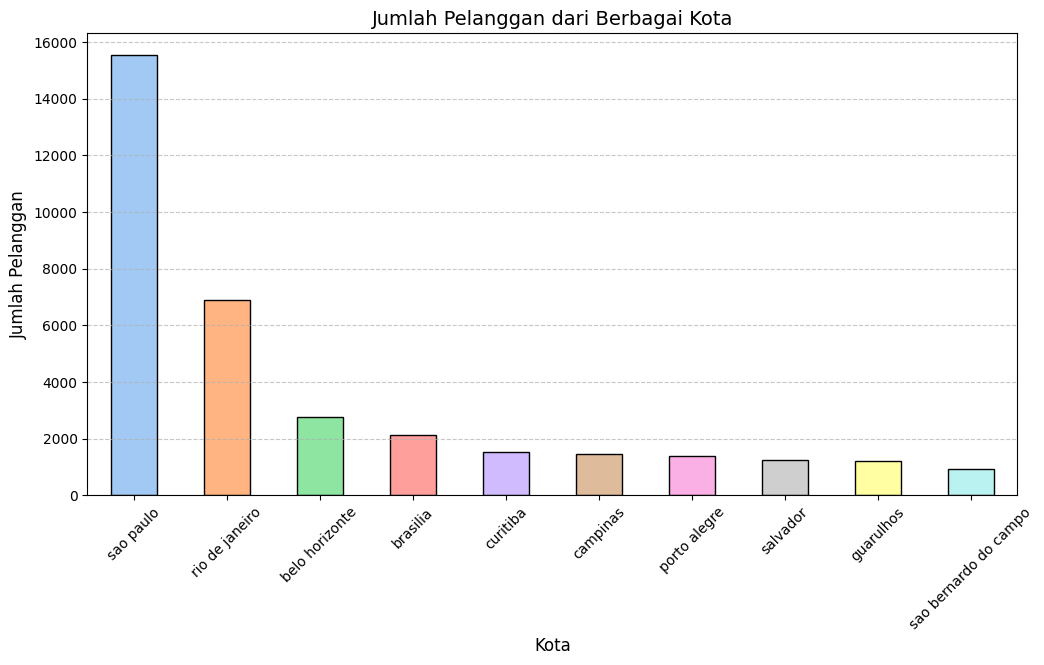

In [96]:
# Hitung jumlah pelanggan per kota
city_counts = data_terbaru_df['customer_city'].value_counts().head(10)  # Ambil 10 kota dengan pelanggan terbanyak
colors = sns.color_palette("pastel", len(city_counts))

# Plot diagram batang
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color=colors, edgecolor='black')

# Tambahkan judul dan label
plt.title("Jumlah Pelanggan dari Berbagai Kota", fontsize=14)
plt.xlabel("Kota", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()

### Pertanyaan 2:

In [97]:
# Hitung jumlah pesanan berdasarkan status
order_status_counts = data_terbaru_df['order_status'].value_counts().reset_index()

# Ubah nama kolom untuk kejelasan
order_status_counts.columns = ['order_status', 'jumlah_pesanan']

# Tampilkan dalam bentuk tabel
print(order_status_counts)

  order_status  jumlah_pesanan
0    delivered           96478
1      shipped            1107
2     canceled             625
3  unavailable             609
4     invoiced             314
5   processing             301
6      created               5
7     approved               2


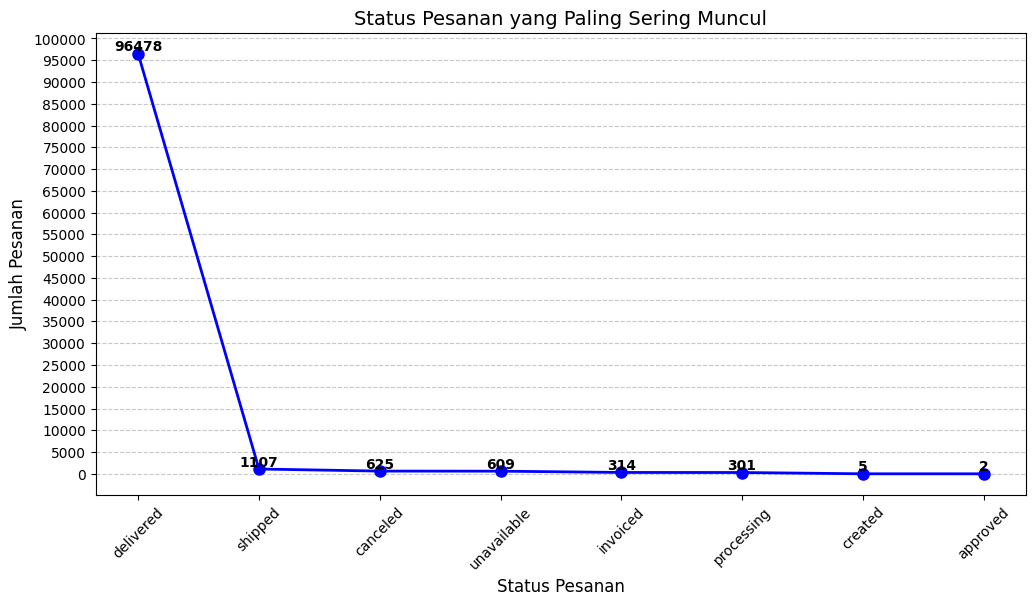

In [77]:
# Hitung jumlah pesanan berdasarkan status
order_status_counts = data_terbaru_df['order_status'].value_counts()

# Plot diagram garis
plt.figure(figsize=(12, 6))
plt.plot(order_status_counts.index, order_status_counts.values, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Tambahkan angka jumlah pesanan di setiap titik
for i, value in enumerate(order_status_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Tambahkan judul dan label
plt.title("Status Pesanan yang Paling Sering Muncul", fontsize=14)
plt.xlabel("Status Pesanan", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)

# Atur skala sumbu y agar lebih detail
plt.yticks(range(0, max(order_status_counts.values) + 5000, 5000))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()

**Insight:**
- Menampilkan 10 kota dengan pelanggan terbanyak
- Menampilkan 10 status pesanan yang sering muncul

## Analisis Lanjutan (Opsional)

## Conclusion



1.   Kota Sao Paulo punya pelanggan paling banyak, yaitu 15.540 orang, mungkin karena kota ini termasuk wilayah metropolitan dengan aktivitas ekonomi yang tinggi. Sebaliknya, Sao Bernardo do Campo jumlah pelanggannya paling sedikit, hanya 938 orang, karena jumlah penduduk atau daya belinya lebih rendah. Sebagai saran, pemasaran bisa lebih difokuskan di kota besar, sementara untuk kota kecil bisa dicoba strategi promo atau ekspansi layanan supaya lebih menarik.
2. Status pesanan "delivered" paling banyak, yaitu 96.478 pesanan, kemungkinan karena mayoritas transaksi berhasil diselesaikan. Sebaliknya, status "approved" paling sedikit, hanya 2 pesanan, mungkin karena pesanan langsung diproses ke tahap berikutnya. Sebagai saran, untuk mengurangi jumlah pesanan dengan status "canceled" atau "unavailable", bisa ditingkatkan transparansi stok dan sistem pembayaran agar pelanggan lebih percaya diri menyelesaikan transaksi.
